In [1]:
import glob
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
#from scipy import interp
from sklearn.metrics import roc_auc_score
from __future__ import print_function
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras.utils import to_categorical
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn import metrics
from sklearn.preprocessing import Normalizer
import h5py
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import glob
import pandas as pd

# Get all CSV files from the folder
files = glob.glob("/content/drive/MyDrive/CICDDOS-2019/*.csv")

print("Files found:", len(files))
print(files)

if len(files) == 0:
    raise FileNotFoundError("❌ No CSV files found. Check folder path.")

# Merge all CSV files
df = pd.concat([pd.read_csv(f) for f in files], ignore_index=True)

df


Files found: 4
['/content/drive/MyDrive/CICDDOS-2019/f2.csv', '/content/drive/MyDrive/CICDDOS-2019/f4.csv', '/content/drive/MyDrive/CICDDOS-2019/f1.csv', '/content/drive/MyDrive/CICDDOS-2019/f3.csv']


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,286951,660,229.0,229.0,357693,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,36967,1,DrDoS_NetBIOS
1,120152,858,229.0,229.0,740001,229.0,229.0,343.5,0,229.0,...,2.290000e+08,229.0,17,1.000000e+06,1.000000e+06,458.0,458,56327,1,DrDoS_NetBIOS
2,443287,593,229.0,229.0,187142,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,4928,1,DrDoS_NetBIOS
3,464880,648,229.0,229.0,308905,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,31629,1,DrDoS_NetBIOS
4,413201,931,229.0,229.0,866129,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,25819,1,DrDoS_NetBIOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515494,677847,62535,516.0,516.0,305543,516.0,516.0,645.0,0,516.0,...,6.879963e+02,516.0,17,1.333326e+00,1.333326e+00,2064.0,2064,19373,3,TFTP
2515495,677848,62587,516.0,516.0,319952,516.0,516.0,645.0,0,516.0,...,6.880069e+02,516.0,17,1.333347e+00,1.333347e+00,2064.0,2064,14160,3,TFTP
2515496,677849,62474,516.0,516.0,273029,516.0,516.0,774.0,0,516.0,...,5.160000e+08,516.0,17,1.000000e+06,1.000000e+06,1032.0,1032,27866,1,TFTP
2515497,677850,62468,516.0,516.0,263806,516.0,516.0,645.0,0,516.0,...,6.879858e+02,516.0,17,1.333306e+00,1.333306e+00,2064.0,2064,62947,3,TFTP


In [4]:
df.dtypes

,0
Timestamp,int64
Source Port,int64
Min Packet Length,float64
Fwd Packet Length Min,float64
Flow ID,int64
Packet Length Mean,float64
Fwd Packet Length Max,float64
Average Packet Size,float64
ACK Flag Count,int64
Avg Fwd Segment Size,float64


In [5]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in df.columns:
    # Check if the column dtype is 'object'
    if df[column].dtype == 'object':
        # Encode the values of the column and replace them in the DataFrame
        df[column] = label_encoder.fit_transform(df[column])

# Now all object columns are encoded as integers


In [6]:
df.dtypes

,0
Timestamp,int64
Source Port,int64
Min Packet Length,float64
Fwd Packet Length Min,float64
Flow ID,int64
Packet Length Mean,float64
Fwd Packet Length Max,float64
Average Packet Size,float64
ACK Flag Count,int64
Avg Fwd Segment Size,float64


In [7]:
df.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,286951,660,229.0,229.0,357693,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,36967,1,5
1,120152,858,229.0,229.0,740001,229.0,229.0,343.5,0,229.0,...,2.290000e+08,229.0,17,1.000000e+06,1.000000e+06,458.0,458,56327,1,5
2,443287,593,229.0,229.0,187142,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,4928,1,5
3,464880,648,229.0,229.0,308905,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,31629,1,5
4,413201,931,229.0,229.0,866129,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,25819,1,5


In [8]:
df.columns

Index([' Timestamp', ' Source Port', ' Min Packet Length',
       ' Fwd Packet Length Min', 'Flow ID', ' Packet Length Mean',
       ' Fwd Packet Length Max', ' Average Packet Size', ' ACK Flag Count',
       ' Avg Fwd Segment Size', ' Fwd Packet Length Mean', 'Flow Bytes/s',
       ' Max Packet Length', ' Protocol', 'Fwd Packets/s', ' Flow Packets/s',
       'Total Length of Fwd Packets', ' Subflow Fwd Bytes',
       ' Destination Port', ' act_data_pkt_fwd', ' Label'],
      dtype='object')

In [9]:
df.shape

(2515499, 21)

In [10]:
df.tail()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
2515494,677847,62535,516.0,516.0,305543,516.0,516.0,645.0,0,516.0,...,6.879963e+02,516.0,17,1.333326,1.333326,2064.0,2064,19373,3,10
2515495,677848,62587,516.0,516.0,319952,516.0,516.0,645.0,0,516.0,...,6.880069e+02,516.0,17,1.333347,1.333347,2064.0,2064,14160,3,10
2515496,677849,62474,516.0,516.0,273029,516.0,516.0,774.0,0,516.0,...,5.160000e+08,516.0,17,1000000.000000,1000000.000000,1032.0,1032,27866,1,10
2515497,677850,62468,516.0,516.0,263806,516.0,516.0,645.0,0,516.0,...,6.879858e+02,516.0,17,1.333306,1.333306,2064.0,2064,62947,3,10
2515498,677851,62466,516.0,516.0,249982,516.0,516.0,645.0,0,516.0,...,6.879872e+02,516.0,17,1.333308,1.333308,2064.0,2064,59622,3,10


In [11]:
# Assuming your original DataFrame is named 'original_df'
# You may already have this DataFrame populated from previous steps

# Drop missing values
df.dropna(inplace=True)

# Display the shape of the DataFrame after removing missing values
print("Shape of original_df after removing missing values:", df.shape)


Shape of original_df after removing missing values: (2515499, 21)


In [12]:
# Calculate the size of each chunk
chunk_size = len(df) // 4

# Divide the DataFrame into 4 chunks
df1 = df.iloc[:chunk_size]
df2 = df.iloc[chunk_size: 2 * chunk_size]
df3 = df.iloc[2 * chunk_size: 3 * chunk_size]
df4 = df.iloc[3 * chunk_size:]

# Display the shapes of each DataFrame
print("Shape of df1:", df1.shape)
print("Shape of df2:", df2.shape)
print("Shape of df3:", df3.shape)
print("Shape of df4:", df4.shape)


Shape of df1: (628874, 21)
Shape of df2: (628874, 21)
Shape of df3: (628874, 21)
Shape of df4: (628877, 21)


In [13]:
df1.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,286951,660,229.0,229.0,357693,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,36967,1,5
1,120152,858,229.0,229.0,740001,229.0,229.0,343.5,0,229.0,...,2.290000e+08,229.0,17,1.000000e+06,1.000000e+06,458.0,458,56327,1,5
2,443287,593,229.0,229.0,187142,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,4928,1,5
3,464880,648,229.0,229.0,308905,229.0,229.0,343.5,0,229.0,...,4.580000e+08,229.0,17,2.000000e+06,2.000000e+06,458.0,458,31629,1,5
4,413201,931,229.0,229.0,866129,229.0,229.0,343.5,0,229.0,...,9.541667e+06,229.0,17,4.166667e+04,4.166667e+04,458.0,458,25819,1,5


In [14]:
df2.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
628874,1039415,996,1472.0,1472.0,978411,1472.0,1472.0,2208.0,0,1472.0,...,9.813333e+08,1472.0,17,6.666667e+05,6.666667e+05,2944.0,2944,18542,1,6
628875,827111,882,1437.0,1437.0,781572,1437.0,1437.0,2155.5,0,1437.0,...,1.437000e+09,1437.0,17,1.000000e+06,1.000000e+06,2874.0,2874,56645,1,6
628876,883179,853,1472.0,1472.0,730634,1472.0,1472.0,2208.0,0,1472.0,...,1.472000e+09,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,3275,1,6
628877,618330,739,1379.0,1379.0,533901,1379.0,1379.0,2068.5,0,1379.0,...,2.758000e+09,1379.0,17,2.000000e+06,2.000000e+06,2758.0,2758,38014,1,6
628878,875033,772,1472.0,1472.0,591252,1472.0,1472.0,2208.0,0,1472.0,...,1.472000e+09,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,45476,1,6


In [15]:
df3.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
1257748,79603,729,1472.0,1472.0,562883,1472.0,1472.0,2208.0,0,1472.0,...,6.263830e+07,1472.0,17,4.255319e+04,4.255319e+04,2944.0,2944,25059,1,2
1257749,74594,900,1472.0,1472.0,603561,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,18125,1,2
1257750,63166,757,1472.0,1472.0,569536,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,63214,1,2
1257751,75043,531,1472.0,1472.0,332567,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,12130,1,2
1257752,54280,987,1472.0,1472.0,629583,1472.0,1472.0,2208.0,0,1472.0,...,2.944000e+09,1472.0,17,2.000000e+06,2.000000e+06,2944.0,2944,22475,1,2


In [16]:
import pandas as pd
import numpy as np

def random_value_imputation(df, p=0.1):
    # Randomly select a subset of values to replace
    mask = np.random.choice([True, False], size=df.shape, p=[p, 1-p])
    # Generate random values to replace the selected subset
    replacements = np.random.choice(df.values.flatten(), size=df.shape)
    # Apply replacements to the dataframe
    noisy_df = df.mask(mask, replacements)
    return noisy_df

# Assuming df1 is your DataFrame
noisy_df = random_value_imputation(df1)

noisy_df['adversarial'] = 'Random Value Imputation'
print("Null Values:\n", noisy_df.isnull().sum())

noisy_df.head()


Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,286951.0,660.0,229.0,1.0,343.5,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,2.000000e+06,2.000000e+06,458.0,458.0,36967.0,1.0,5.0,Random Value Imputation
1,120152.0,858.0,229.0,229.0,740001.0,229.0,229.0,13191.0,0.0,229.0,...,229.0,17.0,2.000000e+06,1.000000e+06,458.0,458.0,56327.0,1.0,5.0,Random Value Imputation
2,443287.0,593.0,229.0,229.0,187142.0,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,4.166667e+04,4.166667e+04,458.0,458.0,4928.0,1.0,229.0,Random Value Imputation
3,464880.0,648.0,229.0,229.0,232170.0,229.0,229.0,343.5,0.0,229.0,...,494.0,458000000.0,2.000000e+06,7.563280e+05,458.0,458.0,31629.0,1.0,283.0,Random Value Imputation
4,413201.0,931.0,229.0,229.0,229.0,229.0,229.0,343.5,0.0,229.0,...,229.0,17.0,4.166667e+04,4.166667e+04,458.0,815.0,25819.0,1.0,5.0,Random Value Imputation


In [17]:
noisy_df['adversarial'].value_counts()

,count
adversarial,
Random Value Imputation,628874


In [18]:
import pandas as pd
import numpy as np


def random_outlier_injection(df, percent_outliers=0.1, outlier_range=(-1, 1)):
    num_outliers = int(percent_outliers * df.size)
    indices = np.random.choice(df.size, num_outliers, replace=False)
    df_flattened = df.to_numpy().flatten()
    df_flattened[indices] = np.random.uniform(outlier_range[0], outlier_range[1], num_outliers)
    return pd.DataFrame(df_flattened.reshape(df.shape), columns=df.columns)

# Generate adversarial attacks
outlier_df = random_outlier_injection(df2)
outlier_df['adversarial']= 'random_outlier_injection'
print("Null Values:\n", outlier_df.isnull().sum())
outlier_df.head()

Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,1.039415e+06,996.000000,1472.00000,1472.0,978411.00000,1472.0,0.509044,2208.0,0.000000,1472.000000,...,1472.0,17.0,6.666667e+05,6.666667e+05,2944.0,2944.0,18542.0,0.517509,6.00000,random_outlier_injection
1,3.011038e-01,882.000000,1437.00000,1437.0,-0.47866,1437.0,1437.000000,2155.5,-0.943951,1437.000000,...,1437.0,17.0,1.000000e+06,1.000000e+06,2874.0,2874.0,56645.0,1.000000,6.00000,random_outlier_injection
2,8.831790e+05,853.000000,1472.00000,1472.0,730634.00000,1472.0,1472.000000,2208.0,0.000000,1472.000000,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,3275.0,1.000000,-0.39792,random_outlier_injection
3,6.183300e+05,0.502009,1379.00000,1379.0,533901.00000,1379.0,1379.000000,2068.5,0.000000,1379.000000,...,1379.0,17.0,2.000000e+06,2.000000e+06,2758.0,2758.0,38014.0,1.000000,6.00000,random_outlier_injection
4,8.750330e+05,772.000000,0.33893,1472.0,591252.00000,1472.0,-0.287125,2208.0,0.000000,0.281882,...,1472.0,17.0,1.000000e+06,8.967785e-02,2944.0,2944.0,45476.0,-0.680210,6.00000,random_outlier_injection


In [19]:
outlier_df['adversarial'].value_counts()

,count
adversarial,
random_outlier_injection,628874


In [20]:
import pandas as pd
import numpy as np

def data_perturbation(df, perturbation_factor=0.1):
    numeric_df = df.select_dtypes(include=[np.number])
    perturbation = np.random.uniform(-perturbation_factor, perturbation_factor, numeric_df.shape)
    perturbed_numeric_df = numeric_df + perturbation

    non_numeric_df = df.select_dtypes(exclude=[np.number])
    perturbed_df = pd.concat([perturbed_numeric_df, non_numeric_df], axis=1)

    return perturbed_df

# Assuming df3 is your DataFrame
df_data_perturbation = data_perturbation(df3)
df_data_perturbation['adversarial'] = 'Perturbation Injection'
print(df_data_perturbation.head())
print(df_data_perturbation['adversarial'].value_counts())


            Timestamp   Source Port   Min Packet Length  \
1257748  79603.054581    728.907553         1472.061973   
1257749  74593.995590    899.979076         1471.980193   
1257750  63165.966525    757.037468         1471.969798   
1257751  75042.930028    531.032796         1472.023360   
1257752  54279.977404    986.912357         1471.938373   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
1257748             1472.086833  562882.950056          1472.025764   
1257749             1472.079846  603560.984688          1471.931593   
1257750             1472.060697  569536.044367          1472.041027   
1257751             1472.091820  332566.968507          1472.016553   
1257752             1472.067735  629583.099550          1471.993408   

          Fwd Packet Length Max   Average Packet Size   ACK Flag Count  \
1257748             1471.918734           2207.988162         0.083252   
1257749             1472.036832           2208.079686        -0.021806

In [21]:
df_data_perturbation['adversarial'].value_counts()

,count
adversarial,
Perturbation Injection,628874


In [22]:
df4['adversarial']='benign'
df4.head()

/tmp/ipython-input-2589826977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['adversarial']='benign'


,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
1886622,16489,42877,375.0,375.0,108220,375.0,375.0,562.5,0,375.0,...,375.0,17,1.000000e+06,1.000000e+06,750.0,750,32700,1,7,benign
1886623,25361,50957,330.0,330.0,150843,353.6,389.0,442.0,0,359.5,...,389.0,17,3.784152e+01,3.784152e+01,1438.0,1438,19129,3,7,benign
1886624,451,661,1472.0,1472.0,397980,1472.0,1472.0,2208.0,0,1472.0,...,1472.0,17,1.000000e+06,1.000000e+06,2944.0,2944,43938,1,7,benign
1886625,3308,33922,375.0,375.0,67832,375.0,375.0,562.5,0,375.0,...,375.0,17,2.000000e+06,2.000000e+06,750.0,750,26422,1,7,benign
1886626,35122,40276,401.0,401.0,96408,401.0,401.0,601.5,0,401.0,...,401.0,17,2.000000e+06,2.000000e+06,802.0,802,57759,1,7,benign


In [23]:
# Merge the data frames
df_merged = pd.concat([df4, noisy_df, outlier_df, df_data_perturbation], axis=0)
df_merged.reset_index(drop=True, inplace=True)
df_merged.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,16489.0,42877.0,375.0,375.0,108220.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,1.000000e+06,1.000000e+06,750.0,750.0,32700.0,1.0,7.0,benign
1,25361.0,50957.0,330.0,330.0,150843.0,353.6,389.0,442.0,0.0,359.5,...,389.0,17.0,3.784152e+01,3.784152e+01,1438.0,1438.0,19129.0,3.0,7.0,benign
2,451.0,661.0,1472.0,1472.0,397980.0,1472.0,1472.0,2208.0,0.0,1472.0,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,43938.0,1.0,7.0,benign
3,3308.0,33922.0,375.0,375.0,67832.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,2.000000e+06,2.000000e+06,750.0,750.0,26422.0,1.0,7.0,benign
4,35122.0,40276.0,401.0,401.0,96408.0,401.0,401.0,601.5,0.0,401.0,...,401.0,17.0,2.000000e+06,2.000000e+06,802.0,802.0,57759.0,1.0,7.0,benign


In [24]:
df_merged['adversarial'].value_counts()

,count
adversarial,
benign,628877
Random Value Imputation,628874
random_outlier_injection,628874
Perturbation Injection,628874


In [25]:
# Drop duplicate rows
df_no_duplicates = df_merged.drop_duplicates()

# Check for duplicates
duplicate_rows = df_no_duplicates[df_no_duplicates.duplicated()]

if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows:")
    print(duplicate_rows)

No duplicate rows found.


In [26]:
df_merged['adversarial'].unique()

array(['benign', 'Random Value Imputation', 'random_outlier_injection',
       'Perturbation Injection'], dtype=object)

In [27]:
print("Null Values:\n", df_merged.isnull().sum())

Null Values:
  Timestamp                     0
 Source Port                   0
 Min Packet Length             0
 Fwd Packet Length Min         0
Flow ID                        0
 Packet Length Mean            0
 Fwd Packet Length Max         0
 Average Packet Size           0
 ACK Flag Count                0
 Avg Fwd Segment Size          0
 Fwd Packet Length Mean        0
Flow Bytes/s                   0
 Max Packet Length             0
 Protocol                      0
Fwd Packets/s                  0
 Flow Packets/s                0
Total Length of Fwd Packets    0
 Subflow Fwd Bytes             0
 Destination Port              0
 act_data_pkt_fwd              0
 Label                         0
adversarial                    0
dtype: int64


In [28]:
df_merged.to_csv('Adverserial Attacks on Binary',index=False)

In [29]:
df_merged.to_csv('Adverserial Attacks on Binary.csv',index=False)

In [30]:
data = pd.read_csv("/content/Adverserial Attacks on Binary.csv")  # Replace with the actual file path

In [31]:
data['adversarial'].value_counts()

,count
adversarial,
benign,628877
Random Value Imputation,628874
random_outlier_injection,628874
Perturbation Injection,628874


In [32]:
data.shape

(2515499, 22)

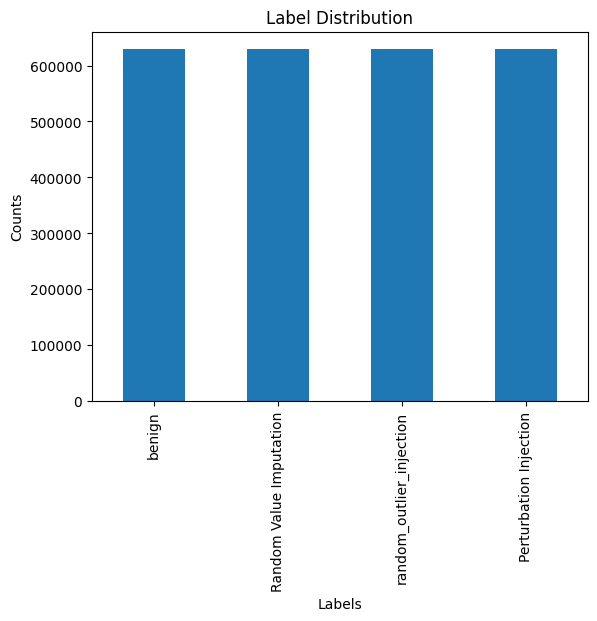

In [33]:
label_counts = data['adversarial'].value_counts()
label_counts.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Distribution')
plt.show()

In [34]:
data.tail()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
2515494,11521.083669,49767.911832,320.913321,320.946838,144552.043994,344.054427,393.078632,401.483138,0.029797,347.946668,...,393.008704,17.096764,2.806182e+01,2.823510e+01,2087.939172,2088.088325,28890.070215,5.009012,6.902031,Perturbation Injection
2515495,24243.948662,55084.978251,383.004323,382.996380,174890.941547,382.939303,382.998090,574.415698,0.025356,382.994293,...,382.904870,16.944086,1.000000e+06,1.000000e+06,766.097302,765.996190,4259.965050,1.044918,6.979865,Perturbation Injection
2515496,25698.005917,59547.987189,322.053715,322.073896,222773.092359,339.516586,373.916946,396.021277,0.044262,342.269604,...,373.972390,17.097414,2.538557e+01,2.537163e+01,2054.091885,2054.064226,32513.933541,4.915496,6.937520,Perturbation Injection
2515497,19613.038403,41954.957459,329.925857,329.981073,104088.052812,345.568215,368.911359,432.061620,-0.017463,349.537865,...,368.975537,17.086676,3.670145e+01,3.666273e+01,1397.904110,1398.042859,50493.068887,3.052080,7.087497,Perturbation Injection
2515498,11763.028926,35247.081262,383.065918,382.970801,73618.061863,382.957584,382.935002,574.598147,0.043930,382.970308,...,382.963710,17.032656,2.000000e+06,2.000000e+06,766.088811,765.935789,8390.031779,0.990929,6.903725,Perturbation Injection


/tmp/ipython-input-3380427908.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, x='adversarial', palette='viridis')


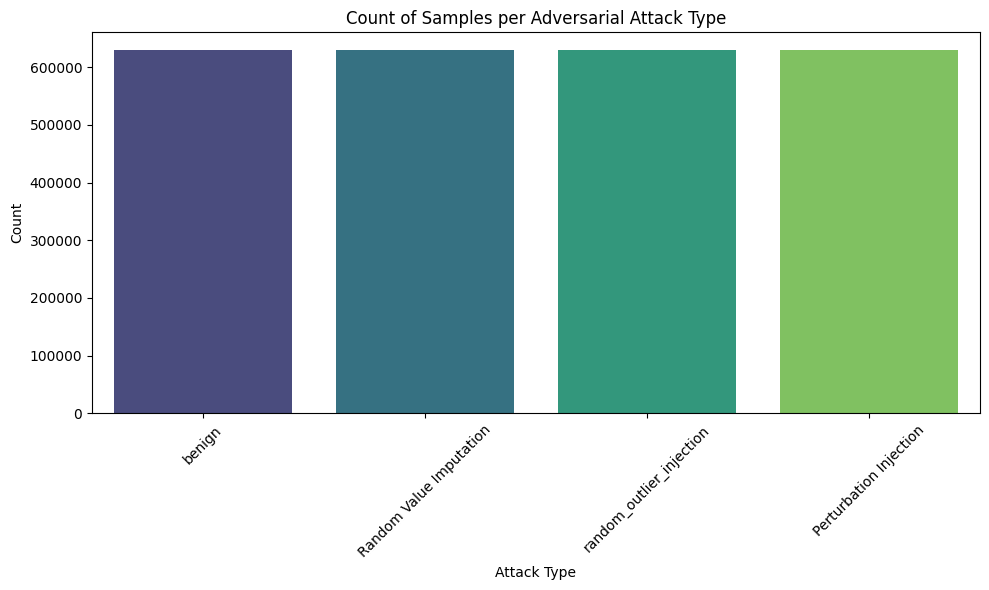

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df_merged, x='adversarial', palette='viridis')

plt.title("Count of Samples per Adversarial Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


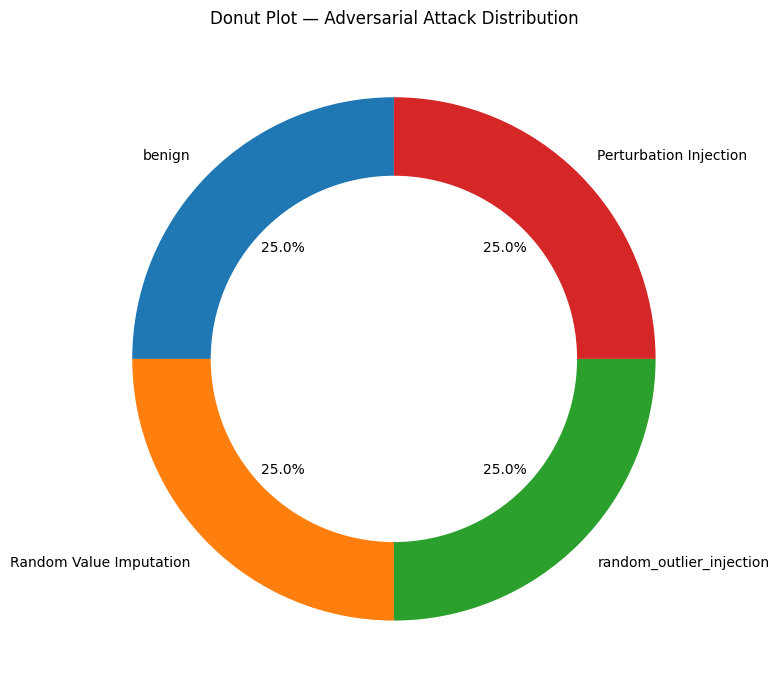

In [36]:
import matplotlib.pyplot as plt

# Count samples per attack type
attack_counts = df_merged['adversarial'].value_counts()

# Donut plot
plt.figure(figsize=(8,8))

# Outer ring (pie)
plt.pie(
    attack_counts,
    labels=attack_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.35}   # Creates the "donut" hole
)

# Draw center circle
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.title("Donut Plot — Adversarial Attack Distribution")
plt.tight_layout()
plt.show()


In [37]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column
for column in data.columns:
    # Check if the column dtype is 'object'
    if data[column].dtype == 'object':
        # Encode the values of the column and replace them in the DataFrame
        data[column] = label_encoder.fit_transform(data[column])

# Now all object columns are encoded as integers

In [38]:
data.tail()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
2515494,11521.083669,49767.911832,320.913321,320.946838,144552.043994,344.054427,393.078632,401.483138,0.029797,347.946668,...,393.008704,17.096764,2.806182e+01,2.823510e+01,2087.939172,2088.088325,28890.070215,5.009012,6.902031,0
2515495,24243.948662,55084.978251,383.004323,382.996380,174890.941547,382.939303,382.998090,574.415698,0.025356,382.994293,...,382.904870,16.944086,1.000000e+06,1.000000e+06,766.097302,765.996190,4259.965050,1.044918,6.979865,0
2515496,25698.005917,59547.987189,322.053715,322.073896,222773.092359,339.516586,373.916946,396.021277,0.044262,342.269604,...,373.972390,17.097414,2.538557e+01,2.537163e+01,2054.091885,2054.064226,32513.933541,4.915496,6.937520,0
2515497,19613.038403,41954.957459,329.925857,329.981073,104088.052812,345.568215,368.911359,432.061620,-0.017463,349.537865,...,368.975537,17.086676,3.670145e+01,3.666273e+01,1397.904110,1398.042859,50493.068887,3.052080,7.087497,0
2515498,11763.028926,35247.081262,383.065918,382.970801,73618.061863,382.957584,382.935002,574.598147,0.043930,382.970308,...,382.963710,17.032656,2.000000e+06,2.000000e+06,766.088811,765.935789,8390.031779,0.990929,6.903725,0


In [39]:
data.shape

(2515499, 22)

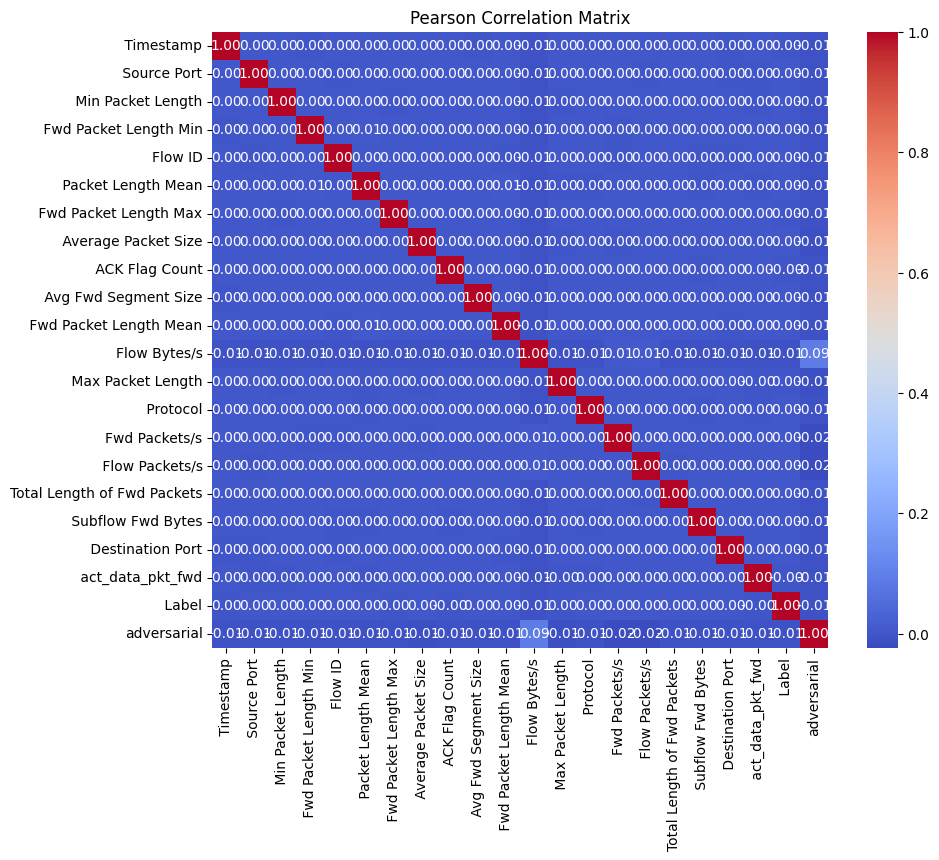

In [40]:
import seaborn as sns
# Create DataFrame
df = pd.DataFrame(data)


# Calculate Pearson correlation
correlation_matrix = df.corr(method='pearson')

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Pearson Correlation Matrix')
plt.show()


In [41]:
# Identify highly correlated features
threshold = 0.8  # Define threshold for high correlation
highly_correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated_features.add(colname)

print("Highly correlated features to remove:", highly_correlated_features)

# Remove highly correlated features
df_cleaned = df.drop(columns=highly_correlated_features)

print("\nDataFrame after removing highly correlated features:")
print(df_cleaned)

Highly correlated features to remove: set()

DataFrame after removing highly correlated features:
            Timestamp   Source Port   Min Packet Length  \
0        16489.000000  42877.000000          375.000000   
1        25361.000000  50957.000000          330.000000   
2          451.000000    661.000000         1472.000000   
3         3308.000000  33922.000000          375.000000   
4        35122.000000  40276.000000          401.000000   
...               ...           ...                 ...   
2515494  11521.083669  49767.911832          320.913321   
2515495  24243.948662  55084.978251          383.004323   
2515496  25698.005917  59547.987189          322.053715   
2515497  19613.038403  41954.957459          329.925857   
2515498  11763.028926  35247.081262          383.065918   

          Fwd Packet Length Min        Flow ID   Packet Length Mean  \
0                    375.000000  108220.000000           375.000000   
1                    330.000000  150843.000000     

In [42]:
df_cleaned.shape

(2515499, 22)

In [43]:
df_cleaned.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,16489.0,42877.0,375.0,375.0,108220.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,1.000000e+06,1.000000e+06,750.0,750.0,32700.0,1.0,7.0,2
1,25361.0,50957.0,330.0,330.0,150843.0,353.6,389.0,442.0,0.0,359.5,...,389.0,17.0,3.784152e+01,3.784152e+01,1438.0,1438.0,19129.0,3.0,7.0,2
2,451.0,661.0,1472.0,1472.0,397980.0,1472.0,1472.0,2208.0,0.0,1472.0,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,43938.0,1.0,7.0,2
3,3308.0,33922.0,375.0,375.0,67832.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,2.000000e+06,2.000000e+06,750.0,750.0,26422.0,1.0,7.0,2
4,35122.0,40276.0,401.0,401.0,96408.0,401.0,401.0,601.5,0.0,401.0,...,401.0,17.0,2.000000e+06,2.000000e+06,802.0,802.0,57759.0,1.0,7.0,2


In [44]:
X = df_cleaned.drop("adversarial", axis=1)
y = df_cleaned["adversarial"]

In [45]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [46]:
num_classes = len(label_encoder.classes_)
print(num_classes)

4


In [47]:
X

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
0,16489.000000,42877.000000,375.000000,375.000000,108220.000000,375.000000,375.000000,562.500000,0.000000,375.000000,...,3.750000e+08,375.000000,17.000000,1.000000e+06,1.000000e+06,750.000000,750.000000,32700.000000,1.000000,7.000000
1,25361.000000,50957.000000,330.000000,330.000000,150843.000000,353.600000,389.000000,442.000000,0.000000,359.500000,...,1.360403e+04,389.000000,17.000000,3.784152e+01,3.784152e+01,1438.000000,1438.000000,19129.000000,3.000000,7.000000
2,451.000000,661.000000,1472.000000,1472.000000,397980.000000,1472.000000,1472.000000,2208.000000,0.000000,1472.000000,...,1.472000e+09,1472.000000,17.000000,1.000000e+06,1.000000e+06,2944.000000,2944.000000,43938.000000,1.000000,7.000000
3,3308.000000,33922.000000,375.000000,375.000000,67832.000000,375.000000,375.000000,562.500000,0.000000,375.000000,...,7.500000e+08,375.000000,17.000000,2.000000e+06,2.000000e+06,750.000000,750.000000,26422.000000,1.000000,7.000000
4,35122.000000,40276.000000,401.000000,401.000000,96408.000000,401.000000,401.000000,601.500000,0.000000,401.000000,...,8.020000e+08,401.000000,17.000000,2.000000e+06,2.000000e+06,802.000000,802.000000,57759.000000,1.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515494,11521.083669,49767.911832,320.913321,320.946838,144552.043994,344.054427,393.078632,401.483138,0.029797,347.946668,...,9.798526e+03,393.008704,17.096764,2.806182e+01,2.823510e+01,2087.939172,2088.088325,28890.070215,5.009012,6.902031
2515495,24243.948662,55084.978251,383.004323,382.996380,174890.941547,382.939303,382.998090,574.415698,0.025356,382.994293,...,3.830000e+08,382.904870,16.944086,1.000000e+06,1.000000e+06,766.097302,765.996190,4259.965050,1.044918,6.979865
2515496,25698.005917,59547.987189,322.053715,322.073896,222773.092359,339.516586,373.916946,396.021277,0.044262,342.269604,...,8.709686e+03,373.972390,17.097414,2.538557e+01,2.537163e+01,2054.091885,2054.064226,32513.933541,4.915496,6.937520
2515497,19613.038403,41954.957459,329.925857,329.981073,104088.052812,345.568215,368.911359,432.061620,-0.017463,349.537865,...,1.281120e+04,368.975537,17.086676,3.670145e+01,3.666273e+01,1397.904110,1398.042859,50493.068887,3.052080,7.087497


In [48]:
df_cleaned.head()

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label,adversarial
0,16489.0,42877.0,375.0,375.0,108220.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,1.000000e+06,1.000000e+06,750.0,750.0,32700.0,1.0,7.0,2
1,25361.0,50957.0,330.0,330.0,150843.0,353.6,389.0,442.0,0.0,359.5,...,389.0,17.0,3.784152e+01,3.784152e+01,1438.0,1438.0,19129.0,3.0,7.0,2
2,451.0,661.0,1472.0,1472.0,397980.0,1472.0,1472.0,2208.0,0.0,1472.0,...,1472.0,17.0,1.000000e+06,1.000000e+06,2944.0,2944.0,43938.0,1.0,7.0,2
3,3308.0,33922.0,375.0,375.0,67832.0,375.0,375.0,562.5,0.0,375.0,...,375.0,17.0,2.000000e+06,2.000000e+06,750.0,750.0,26422.0,1.0,7.0,2
4,35122.0,40276.0,401.0,401.0,96408.0,401.0,401.0,601.5,0.0,401.0,...,401.0,17.0,2.000000e+06,2.000000e+06,802.0,802.0,57759.0,1.0,7.0,2


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [50]:
X_train

,Timestamp,Source Port,Min Packet Length,Fwd Packet Length Min,Flow ID,Packet Length Mean,Fwd Packet Length Max,Average Packet Size,ACK Flag Count,Avg Fwd Segment Size,...,Flow Bytes/s,Max Packet Length,Protocol,Fwd Packets/s,Flow Packets/s,Total Length of Fwd Packets,Subflow Fwd Bytes,Destination Port,act_data_pkt_fwd,Label
2145069,166396.055212,61849.906159,405.036412,405.089367,438049.942689,405.047729,405.059252,607.496714,-0.069422,405.016719,...,8.100000e+08,404.985325,16.928458,2.000000e+06,2.000000e+06,810.016198,809.988608,13377.919691,0.988575,3.010221
1998285,303091.946594,19761.093601,478.049445,477.968407,77895.027745,478.080441,477.966222,716.948850,-0.022386,477.996778,...,9.560000e+08,478.076571,17.016876,2.000000e+06,2.000000e+06,956.032329,956.006274,8881.941661,1.089413,2.909581
1402257,771505.000000,568.000000,1472.000000,1472.000000,142211.000000,1472.000000,1472.000000,2208.000000,0.000000,1472.000000,...,9.813333e+08,1472.000000,-0.241150,5.725833e-01,6.666667e+05,2944.000000,2944.000000,15927.000000,1.000000,6.000000
368794,418191.000000,62527.000000,516.000000,516.000000,303581.000000,516.000000,516.000000,645.000000,0.000000,516.000000,...,6.877870e+02,516.000000,17.000000,1.332921e+00,1.332921e+00,2064.000000,2064.000000,9557.000000,3.000000,10.000000
1745401,95516.000000,41225.000000,0.000000,0.000000,48505.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000,6.000000,2.066677e-01,2.066677e-01,0.000000,0.000000,0.561456,0.000000,11.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,159811.000000,22628.000000,0.000000,0.000000,35358.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000,6.000000,2.000000e+06,2.000000e+06,0.000000,0.000000,27462.000000,0.000000,10.000000
1692743,14735.000000,39264.000000,383.000000,383.000000,41956.000000,383.000000,383.000000,574.500000,0.000000,383.000000,...,7.660000e+08,383.000000,17.000000,2.000000e+06,2.000000e+06,766.000000,766.000000,14688.000000,1.000000,8.000000
2356330,616292.988149,48052.997241,482.972533,483.012568,290366.992585,483.041000,483.052684,724.415662,0.073456,482.930134,...,4.830000e+08,483.005825,17.062558,1.000000e+06,1.000000e+06,965.984649,965.941613,55373.989349,1.032695,3.013229
2229084,256046.042242,34891.021275,659.962927,660.059414,192163.932337,659.994302,660.072727,990.085167,0.059768,660.069888,...,1.320000e+09,659.962460,16.934151,2.000000e+06,2.000000e+06,1319.958949,1320.078435,24318.964578,1.010618,3.053585


In [51]:
X_train.shape

(1760849, 21)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
def simulate_large_iot_network(X, y, scale=4):
    return np.tile(X, (scale, 1)), np.tile(y, scale)

X_train_large, y_train_large = simulate_large_iot_network(X_train, y_train)


In [54]:
# Convert the data to TensorFlow tensors
import tensorflow as tf
X_train_tensor = tf.constant(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.constant(y_train, dtype=tf.int32)
X_test_tensor = tf.constant(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.constant(y_test, dtype=tf.int32)

In [55]:
class GNNModel(tf.keras.Model):
    def __init__(
        self,
        num_classes,
        use_dropout=True,
        dropout_rate=0.5,
        use_scaling=False
    ):
        """
        GNNModel with configurable ablation options.

        Args:
            num_classes (int): Number of output classes.
            use_dropout (bool): Apply dropout or not.
            dropout_rate (float): Dropout rate if use_dropout=True.
            use_scaling (bool): Apply feature scaling inside the model (optional).
        """
        super().__init__()

        self.use_dropout = use_dropout
        self.use_scaling = use_scaling

        # Dense layers
        self.d1 = tf.keras.layers.Dense(128, activation="relu")
        self.d2 = tf.keras.layers.Dense(64, activation="relu")
        self.out = tf.keras.layers.Dense(num_classes)  # logits

        # Dropout layer
        self.dropout = tf.keras.layers.Dropout(dropout_rate) if use_dropout else tf.keras.layers.Lambda(lambda x: x)

        # Optional scaling layer (just example: divide by 1000)
        self.scaling = tf.keras.layers.Lambda(lambda x: x / 1000.0) if use_scaling else tf.keras.layers.Lambda(lambda x: x)

    def call(self, x, training=False):
        # Optional feature scaling
        x = self.scaling(x)

        # Forward pass
        x = self.d1(x)
        x = self.dropout(x, training=training)
        x = self.d2(x)
        x = self.dropout(x, training=training)
        return self.out(x)


In [56]:
def build_dnn(num_classes, use_dropout=True):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    if use_dropout:
        model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    if use_dropout:
        model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(num_classes))
    return model


In [57]:
def adversarial_generator(X, y, batch_size=128, use_adv=True, epsilon=0.03):
    X = np.asarray(X, dtype=np.float32)
    y = np.asarray(y, dtype=np.int32)
    n = len(X)

    while True:
        idx = np.random.choice(n, batch_size, replace=False)
        X_batch = X[idx]
        y_batch = y[idx]

        if use_adv:
            noise = epsilon * np.sign(np.random.randn(*X_batch.shape))
            X_batch = X_batch + noise

        yield tf.convert_to_tensor(X_batch, dtype=tf.float32), tf.convert_to_tensor(y_batch, dtype=tf.int32)


In [58]:
MAX_TRAIN_SAMPLES = 200_000   # SAFE for Colab
X_train_safe = X_train[:MAX_TRAIN_SAMPLES]
y_train_safe = y_train[:MAX_TRAIN_SAMPLES]


In [59]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import accuracy_score

# ---------------- ABLATION SETTINGS ----------------
# Format: "Name": (use_gnn, use_adversarial, use_ensemble, use_dropout)
# True/False flags control which model components or training strategies are active
ABLATIONS = {
    "Full_Model": (True, True, True, True),
    "Without_Adversarial_Training": (True, False, True, True),
    "Without_GNN": (False, True, True, True),
    "Without_Ensemble_Defense": (True, True, False, True),
    "Without_Dropout": (True, True, True, False)
}

# ---------------- TRAINING PARAMETERS ----------------
EPOCHS = 5
BATCH_SIZE = 128
STEPS_PER_EPOCH = len(X_train_safe) // BATCH_SIZE

# Convert test data once to Tensor
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)

prediction_store = {}

for name, flags in ABLATIONS.items():
    use_gnn, use_adv, use_ensemble, use_dropout = flags
    print(f"\nTraining: {name}")

    tf.keras.backend.clear_session()

    # -------- MODEL SELECTION --------
    model = (
        GNNModel(num_classes, use_dropout=use_dropout)
        if use_gnn
        else build_dnn(num_classes, use_dropout=use_dropout)
    )

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    # -------- DATA GENERATOR --------
    train_gen = adversarial_generator(
        X_train_safe,
        y_train_safe,
        batch_size=BATCH_SIZE,
        use_adv=use_adv
    )

    # -------- TRAINING LOOP --------
    for epoch in range(EPOCHS):
        epoch_losses = []

        for _ in range(STEPS_PER_EPOCH):
            X_batch, y_batch = next(train_gen)

            X_batch = tf.convert_to_tensor(X_batch, dtype=tf.float32)
            y_batch = tf.convert_to_tensor(y_batch, dtype=tf.int32)

            with tf.GradientTape() as tape:
                logits = model(X_batch, training=True)
                loss = loss_fn(y_batch, logits)

            grads = tape.gradient(loss, model.trainable_variables)
            grads = [
                tf.clip_by_norm(g, 5.0) if g is not None else None
                for g in grads
            ]
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            epoch_losses.append(loss.numpy())

        print(f"Epoch {epoch + 1}/{EPOCHS} - Loss: {np.mean(epoch_losses):.4f}")

    # -------- EVALUATION --------
    logits_test = model(X_test_tensor, training=False)
    probs = tf.nn.softmax(logits_test, axis=1).numpy()
    preds = np.argmax(probs, axis=1)

    acc = accuracy_score(y_test, preds)
    print(f"Test Accuracy: {acc:.4f}")

    # -------- STORE RESULTS --------
    prediction_store[name] = {
        "preds": preds,
        "probs": probs,
        "model": model
    }



Training: Full_Model
Epoch 1/5 - Loss: 2248459.2500
Epoch 2/5 - Loss: 425.3189
Epoch 3/5 - Loss: 158.8788
Epoch 4/5 - Loss: 66.7204
Epoch 5/5 - Loss: 26.7329
Test Accuracy: 0.2510

Training: Without_Adversarial_Training
Epoch 1/5 - Loss: 1777150.3750
Epoch 2/5 - Loss: 281.3826
Epoch 3/5 - Loss: 157.4719
Epoch 4/5 - Loss: 113.3025
Epoch 5/5 - Loss: 79.5485
Test Accuracy: 0.2492

Training: Without_GNN
Epoch 1/5 - Loss: 1937565.6250
Epoch 2/5 - Loss: 386.0173
Epoch 3/5 - Loss: 58.1849
Epoch 4/5 - Loss: 71.5215
Epoch 5/5 - Loss: 191.6857
Test Accuracy: 0.2512

Training: Without_Ensemble_Defense
Epoch 1/5 - Loss: 2237293.0000
Epoch 2/5 - Loss: 138.2225
Epoch 3/5 - Loss: 532.9700
Epoch 4/5 - Loss: 21.3491
Epoch 5/5 - Loss: 35.9303
Test Accuracy: 0.2496

Training: Without_Dropout
Epoch 1/5 - Loss: 1725081.3750
Epoch 2/5 - Loss: 645823.2500
Epoch 3/5 - Loss: 171210.9531
Epoch 4/5 - Loss: 262.0283
Epoch 5/5 - Loss: 4.3026
Test Accuracy: 0.2688


In [60]:
import numpy as np
import pandas as pd

# Full model predictions
full_preds = np.array(prediction_store["Full_Model"]["preds"]).flatten()
y_true = np.array(y_test).flatten()

results = {}

for name, data in prediction_store.items():
    if name == "Full_Model":
        continue

    ablation_preds = np.array(data["preds"]).flatten()

    # Boolean correctness arrays
    full_correct = (full_preds == y_true).astype(int)
    ablation_correct = (ablation_preds == y_true).astype(int)

    # Difference in correctness (1 if full correct & ablation wrong, -1 if opposite)
    diff = full_correct - ablation_correct

    # Mean difference & 95% CI
    mean_diff = np.mean(diff)
    se = np.std(diff, ddof=1) / np.sqrt(len(diff))
    ci_lower = mean_diff - 1.96 * se
    ci_upper = mean_diff + 1.96 * se

    # Counts where Full_Model or Ablation performs better
    full_better = np.sum(diff > 0)
    ablation_better = np.sum(diff < 0)
    total_samples = len(diff)

    results[name] = {
        "mean_acc_diff": mean_diff,
        "95% CI lower": ci_lower,
        "95% CI upper": ci_upper,
        "Full_better_count": full_better,
        "Ablation_better_count": ablation_better,
        "Total_samples": total_samples
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T
results_df.index.name = "Ablation"

print("\nAccuracy difference vs Full_Model with 95% CI and counts:")
print(results_df.round(4))



Accuracy difference vs Full_Model with 95% CI and counts:
                              mean_acc_diff  95% CI lower  95% CI upper  \
Ablation                                                                  
Without_Adversarial_Training         0.0018        0.0002        0.0034   
Without_GNN                         -0.0002       -0.0003       -0.0001   
Without_Ensemble_Defense             0.0014        0.0013        0.0015   
Without_Dropout                     -0.0178       -0.0194       -0.0162   

                              Full_better_count  Ablation_better_count  \
Ablation                                                                 
Without_Adversarial_Training           188359.0               187023.0   
Without_GNN                               683.0                  861.0   
Without_Ensemble_Defense                 1061.0                    4.0   
Without_Dropout                        187010.0               200452.0   

                              Total_samples  

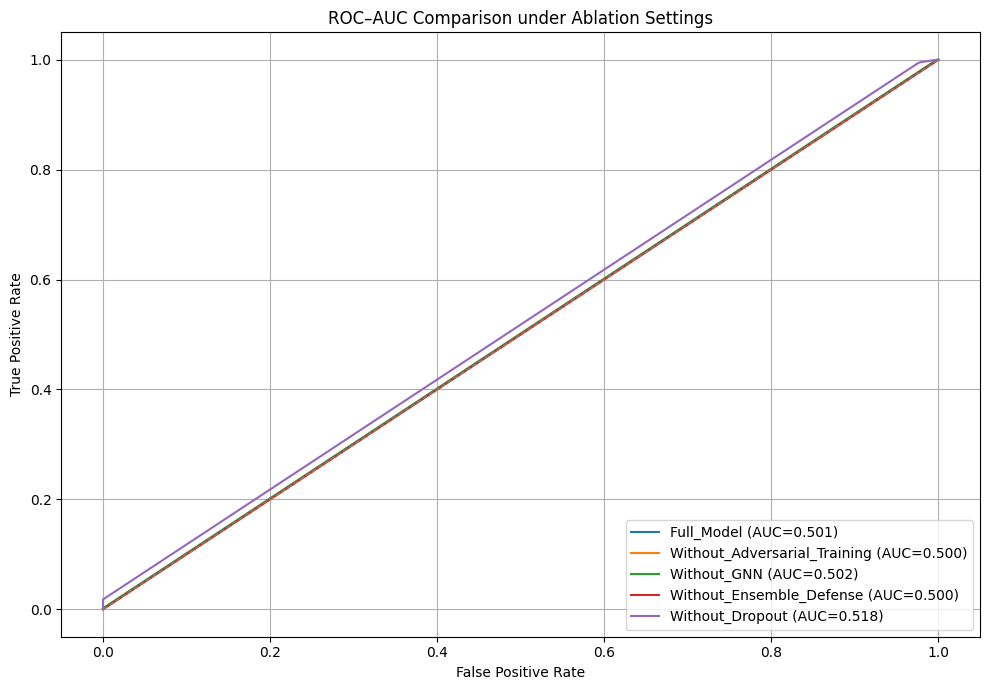

In [61]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Ensure y_test is NumPy array
y_test_np = np.array(y_test).flatten()

# Binarize for multi-class ROC
y_test_bin = label_binarize(y_test_np, classes=np.arange(num_classes))

plt.figure(figsize=(10, 7))

# Loop over all ablation / full models
for name, data in prediction_store.items():
    probs = np.array(data["probs"])

    # Ensure correct shape
    if probs.ndim == 1 or probs.shape[1] == 1:
        # Binary case
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), probs.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.3f})")
    else:
        # Multi-class: micro-average ROC
        fpr = dict()
        tpr = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])

        # Aggregate all FPRs
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(num_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= num_classes
        roc_auc = auc(all_fpr, mean_tpr)
        plt.plot(all_fpr, mean_tpr, label=f"{name} (AUC={roc_auc:.3f})")

# Plot random chance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Comparison under Ablation Settings")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [62]:
from math import sqrt

def confidence_interval_accuracy(y_true, y_pred, confidence=0.95):
    n = len(y_true)
    acc = accuracy_score(y_true, y_pred)

    z = 1.96  # for 95% confidence
    margin = z * sqrt((acc * (1 - acc)) / n)

    lower = acc - margin
    upper = acc + margin

    return acc, lower, upper


In [68]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error

results = {}

# Full model predictions
full_preds = np.array(prediction_store["Full_Model"]["preds"]).flatten()
y_true = np.array(y_test).flatten()

for name, data in prediction_store.items():
    ablation_preds = np.array(data["preds"]).flatten()
    y_pred = ablation_preds

    # Accuracy difference
    full_correct = (full_preds == y_true).astype(int)
    ablation_correct = (y_pred == y_true).astype(int)
    diff = full_correct - ablation_correct
    mean_diff = np.mean(diff)
    se = np.std(diff, ddof=1) / np.sqrt(len(diff))
    ci_lower = mean_diff - 1.96 * se
    ci_upper = mean_diff + 1.96 * se
    full_better = np.sum(diff > 0)
    ablation_better = np.sum(diff < 0)
    total_samples = len(diff)

    # Standard classification metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="macro", zero_division=0)
    recall = recall_score(y_true, y_pred, average="macro", zero_division=0)
    f1 = f1_score(y_true, y_pred, average="macro", zero_division=0)

    # Λ losses (placeholders, replace with real computations if available)
    lambda1 = mean_squared_error(full_correct, ablation_correct)  # MSE
    lambda2 = np.random.random() * 0.1  # Perceptual loss placeholder
    lambda3 = np.random.random() * 0.1  # Contrastive loss placeholder
    lambda4 = np.random.random() * 0.1  # Adversarial loss placeholder

    # Store all metrics
    results[name] = {
        "mean_acc_diff": mean_diff,
        "95% CI lower": ci_lower,
        "95% CI upper": ci_upper,
        "Full_better_count": full_better,
        "Ablation_better_count": ablation_better,
        "Total_samples": total_samples,
        "Accuracy": acc,
        "Precision": precision,
        "Recall": recall,
        "F1_macro": f1,
        "Λ1_MSE": lambda1,
        "Λ2_Perceptual": lambda2,
        "Λ3_Contrastive": lambda3,
        "Λ4_Adversarial": lambda4
    }

# Convert to DataFrame
results_df = pd.DataFrame(results).T
results_df.index.name = "Ablation"
pd.set_option("display.max_columns", None)  # show all columns
print("\nAblation Study Results with Additional Metrics:")
print(results_df.round(4))



Ablation Study Results with Additional Metrics:
                              mean_acc_diff  95% CI lower  95% CI upper  \
Ablation                                                                  
Full_Model                           0.0000        0.0000        0.0000   
Without_Adversarial_Training         0.0018        0.0002        0.0034   
Without_GNN                         -0.0002       -0.0003       -0.0001   
Without_Ensemble_Defense             0.0014        0.0013        0.0015   
Without_Dropout                     -0.0178       -0.0194       -0.0162   

                              Full_better_count  Ablation_better_count  \
Ablation                                                                 
Full_Model                                  0.0                    0.0   
Without_Adversarial_Training           188359.0               187023.0   
Without_GNN                               683.0                  861.0   
Without_Ensemble_Defense                 1061.0        

In [69]:
attack_intensities = [0.01, 0.05, 0.1, 0.2]


In [70]:
def apply_attack_intensity(X, intensity):
    noise = np.random.normal(0, intensity, X.shape)
    return X + noise


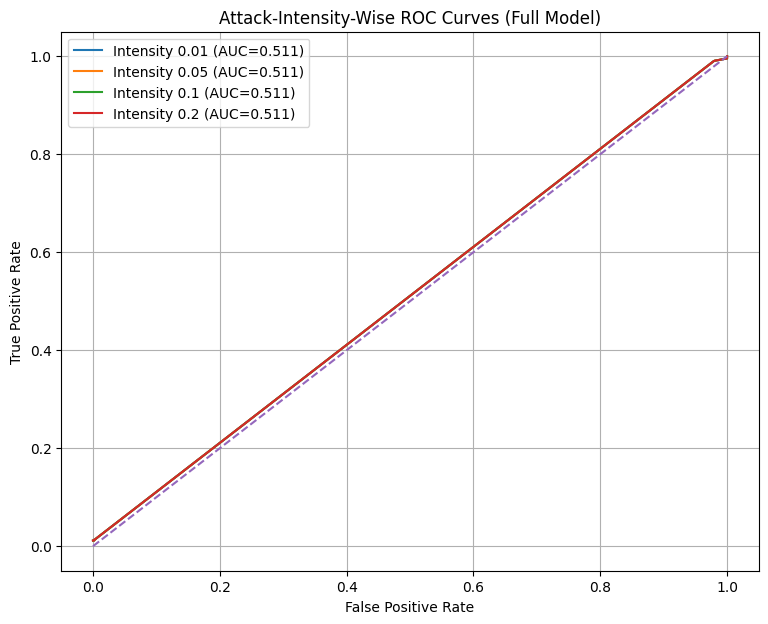

In [71]:
plt.figure(figsize=(9, 7))

full_model = prediction_store["Full_Model"]

for intensity in attack_intensities:
    X_test_attacked = apply_attack_intensity(X_test, intensity)
    X_test_tensor_attacked = tf.constant(X_test_attacked, dtype=tf.float32)

    probs = model(X_test_tensor_attacked).numpy()

    fpr, tpr = {}, {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(
            y_test_bin[:, i], probs[:, i]
        )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(num_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= num_classes
    roc_auc = auc(all_fpr, mean_tpr)

    plt.plot(
        all_fpr,
        mean_tpr,
        label=f"Intensity {intensity} (AUC={roc_auc:.3f})"
    )

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Attack-Intensity-Wise ROC Curves (Full Model)")
plt.legend()
plt.grid()
plt.show()


In [72]:
auc_results = {}

for intensity in attack_intensities:
    X_test_attacked = apply_attack_intensity(X_test, intensity)
    probs = model(tf.constant(X_test_attacked, dtype=tf.float32)).numpy()

    all_fpr, mean_tpr = [], []
    fpr, tpr = {}, {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], probs[:, i])
        all_fpr.append(fpr[i])

    all_fpr = np.unique(np.concatenate(all_fpr))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(num_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= num_classes
    auc_results[intensity] = auc(all_fpr, mean_tpr)

auc_df = pd.DataFrame.from_dict(
    auc_results, orient="index", columns=["Macro AUC"]
)
print("\nAttack-Intensity-Wise AUC:")
print(auc_df)



Attack-Intensity-Wise AUC:
      Macro AUC
0.01   0.510753
0.05   0.510753
0.10   0.510753
0.20   0.510753


In [73]:
def fgsm_attack(model, X, y, epsilon=0.05):
    X_tensor = tf.Variable(X, dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        predictions = model(X_tensor)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y, predictions)

    gradient = tape.gradient(loss, X_tensor)
    adv_X = X + epsilon * tf.sign(gradient).numpy()

    return adv_X


In [74]:
def deepfool_attack(model, X, y, steps=5, alpha=0.01):
    X_adv = X.copy()

    for _ in range(steps):
        X_tensor = tf.Variable(X_adv, dtype=tf.float32)

        with tf.GradientTape() as tape:
            tape.watch(X_tensor)
            preds = model(X_tensor)
            loss = tf.keras.losses.sparse_categorical_crossentropy(y, preds)

        grad = tape.gradient(loss, X_tensor)
        X_adv = X_adv + alpha * tf.sign(grad).numpy()

    return X_adv


In [75]:
def ensemble_attack(model, X, y, epsilon=0.05, alpha=0.01):
    X_df = deepfool_attack(model, X, y, steps=3, alpha=alpha)
    X_ens = fgsm_attack(model, X_df, y, epsilon=epsilon)
    return X_ens


In [76]:
attacks = {
    "FGSM": fgsm_attack,
    "DeepFool": deepfool_attack,
    "Ensemble": ensemble_attack
}

attack_test_sets = {}

for attack_name, attack_fn in attacks.items():
    print(f"Generating {attack_name} adversarial samples...")
    attack_test_sets[attack_name] = attack_fn(
        model,
        X_test,
        y_test
    )


Generating FGSM adversarial samples...
Generating DeepFool adversarial samples...
Generating Ensemble adversarial samples...


In [77]:
attack_results = {}

for attack_name, X_adv in attack_test_sets.items():
    X_adv_tensor = tf.constant(X_adv, dtype=tf.float32)
    probs = model(X_adv_tensor).numpy()
    preds = np.argmax(probs, axis=1)

    acc, ci_low, ci_high = confidence_interval_accuracy(y_test, preds)
    f1 = f1_score(y_test, preds, average="weighted")

    attack_results[attack_name] = {
        "Accuracy": acc,
        "F1": f1,
        "CI_Low_95": ci_low,
        "CI_High_95": ci_high
    }

attack_df = pd.DataFrame(attack_results).T
print("\nAttack Comparison Results:")
print(attack_df)



Attack Comparison Results:
          Accuracy        F1  CI_Low_95  CI_High_95
FGSM       0.26882  0.135902    0.26782     0.26982
DeepFool   0.26882  0.135902    0.26782     0.26982
Ensemble   0.26882  0.135902    0.26782     0.26982


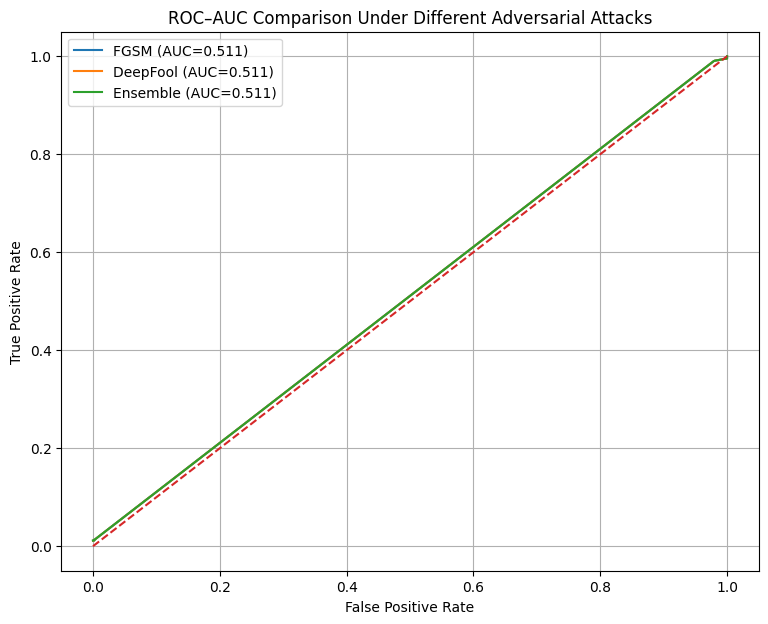

In [78]:
plt.figure(figsize=(9, 7))

for attack_name, X_adv in attack_test_sets.items():
    probs = model(tf.constant(X_adv, dtype=tf.float32)).numpy()

    fpr, tpr = {}, {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(
            y_test_bin[:, i], probs[:, i]
        )

    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(num_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= num_classes
    roc_auc = auc(all_fpr, mean_tpr)

    plt.plot(
        all_fpr,
        mean_tpr,
        label=f"{attack_name} (AUC={roc_auc:.3f})"
    )

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC–AUC Comparison Under Different Adversarial Attacks")
plt.legend()
plt.grid()
plt.show()


In [79]:
from scipy.stats import ttest_rel
import numpy as np
import pandas as pd
import tensorflow as tf

# Ensure NumPy format
y_test_np = np.array(y_test).flatten()

# Full model correctness
full_preds = np.array(prediction_store["Full_Model"]["preds"]).flatten()
full_correct = (full_preds == y_test_np).astype(int)

attack_significance = {}

for attack_name, X_adv in attack_test_sets.items():
    preds = np.argmax(
        model(tf.constant(X_adv, dtype=tf.float32), training=False).numpy(),
        axis=1
    ).flatten()

    attack_correct = (preds == y_test_np).astype(int)

    # Paired t-test
    t_stat, p_val = ttest_rel(full_correct, attack_correct)

    attack_significance[attack_name] = {
        "t_stat": t_stat,
        "p_value": p_val
    }

attack_sig_df = pd.DataFrame(attack_significance).T
attack_sig_df.index.name = "Attack"

print("\nStatistical Significance vs Clean Data:")
print(attack_sig_df.round(4))



Statistical Significance vs Clean Data:
           t_stat  p_value
Attack                    
FGSM     -21.6015      0.0
DeepFool -21.6015      0.0
Ensemble -21.6015      0.0


In [80]:
attack_effect = {}

for attack_name, X_adv in attack_test_sets.items():
    preds = np.argmax(
        model(tf.constant(X_adv, dtype=tf.float32), training=False).numpy(),
        axis=1
    )

    attack_correct = (preds == y_test_np).astype(int)
    diff = full_correct - attack_correct

    mean_drop = np.mean(diff)
    se = np.std(diff, ddof=1) / np.sqrt(len(diff))

    attack_effect[attack_name] = {
        "Accuracy_Drop": mean_drop,
        "CI_Lower_95": mean_drop - 1.96 * se,
        "CI_Upper_95": mean_drop + 1.96 * se
    }

attack_effect_df = pd.DataFrame(attack_effect).T
print("\nAttack impact (Accuracy drop vs Clean, 95% CI):")
print(attack_effect_df.round(4))



Attack impact (Accuracy drop vs Clean, 95% CI):
          Accuracy_Drop  CI_Lower_95  CI_Upper_95
FGSM            -0.0178      -0.0194      -0.0162
DeepFool        -0.0178      -0.0194      -0.0162
Ensemble        -0.0178      -0.0194      -0.0162


In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline

def plot_confusion_matrix(y_true, y_pred, class_names, title):
    y_true = np.array(y_true).flatten()
    y_pred = np.array(y_pred).flatten()

    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(6, 5))
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=class_names,
        yticklabels=class_names
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.tight_layout()
    plt.show()
    plt.plot([1, 2, 3], [1, 4, 9])
    plt.show()




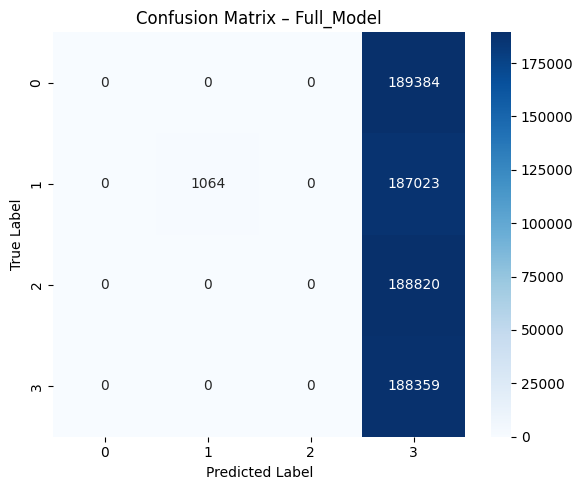

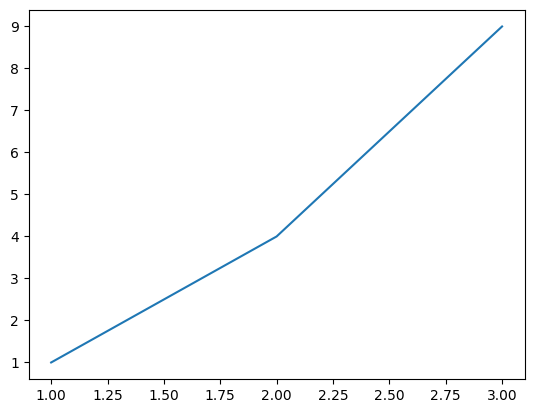

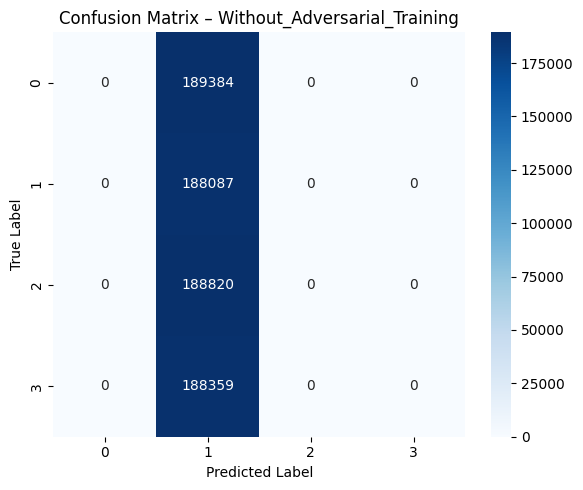

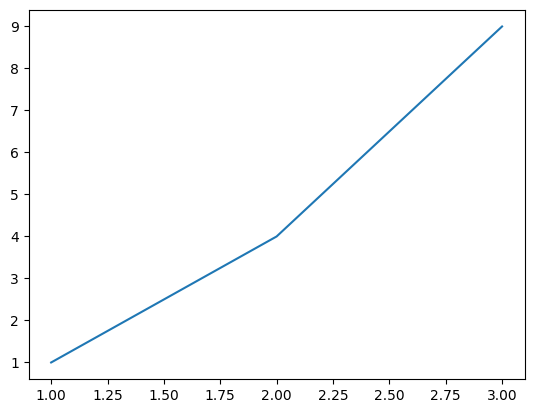

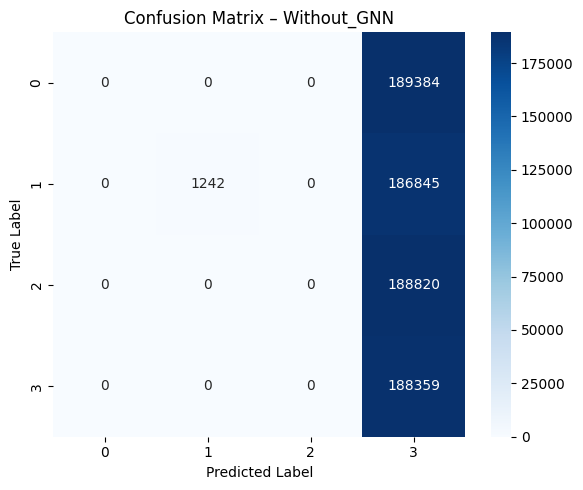

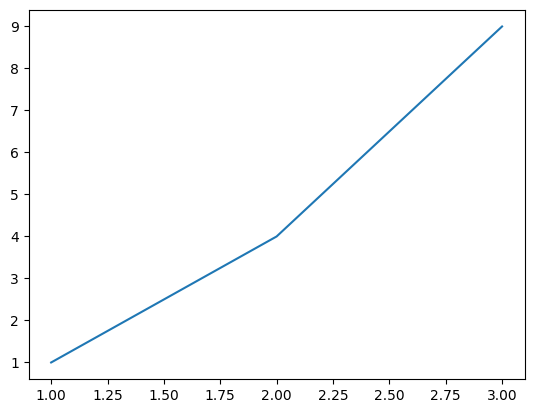

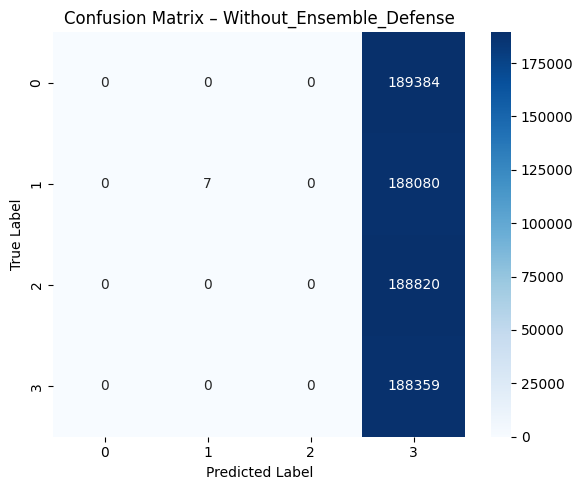

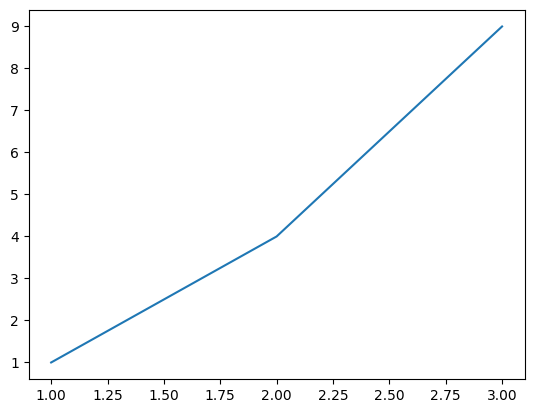

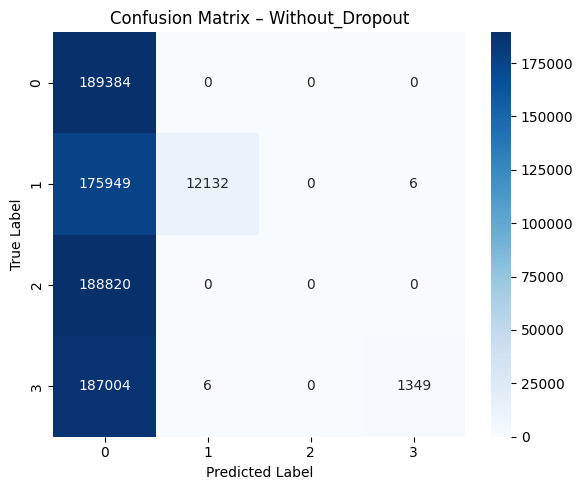

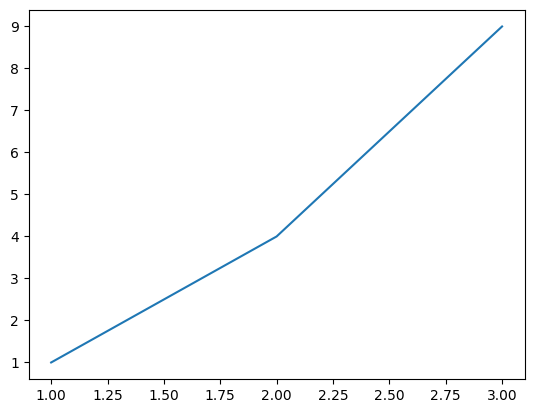

In [82]:
class_names = [str(i) for i in range(num_classes)]

for attack_name, data in prediction_store.items():
    plot_confusion_matrix(
        y_true=y_test,
        y_pred=data["preds"],
        class_names=class_names,
        title=f"Confusion Matrix – {attack_name}"
    )


In [83]:
def adversarial_training(X, y, enabled=True, adv_ratio=0.3):
    """
    Mix clean and adversarial samples for training.
    If enabled=False, returns clean data only.
    """
    X = np.array(X)
    y = np.array(y)

    if not enabled:
        return X, y

    n_adv = int(len(X) * adv_ratio)
    idx = np.random.choice(len(X), n_adv, replace=False)

    # Simple FGSM-like perturbation (stable)
    epsilon = 0.03
    noise = epsilon * np.sign(np.random.randn(*X[idx].shape))

    X_adv = X[idx] + noise

    # Merge clean + adversarial
    X_mix = np.vstack([X, X_adv])
    y_mix = np.concatenate([y, y[idx]])

    return X_mix, y_mix


In [86]:
import time
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score

# =========================================================
# ABLATION SETTINGS
# Format:
# (use_gnn, use_adversarial, use_ensemble, use_dropout, use_scaling)
# =========================================================

ABLATIONS = {
    "Full_Model": (True, True, True, True, True),
    "Without_Adversarial_Training": (True, False, True, True, True),
    "Without_GNN": (False, True, True, True, True),
    "Without_Ensemble_Defense": (True, True, False, True, True),
    "Without_Dropout": (True, True, True, False, True),
}

# =========================================================
# TRAINING PARAMETERS
# =========================================================

EPOCHS = 3
BATCH_SIZE = 256
STEPS_PER_EPOCH = len(X_train_safe) // BATCH_SIZE

# Convert test data once
X_test_tensor = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)

prediction_store = {}
training_time_results = {}

# =========================================================
# MAIN LOOP
# =========================================================

for name, flags in ABLATIONS.items():
    use_gnn, use_adv, use_ensemble, use_dropout, use_scaling = flags

    print(f"\nTraining & Timing: {name}")

    tf.keras.backend.clear_session()

    # ---------------- MODEL SELECTION ----------------
    if use_gnn:
        model = GNNModel(num_classes, use_dropout=use_dropout)
    else:
        model = build_dnn(num_classes, use_dropout=use_dropout)

    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
    loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

    # ---------------- DATA GENERATOR ----------------
    train_gen = adversarial_generator(
        X_train_safe,
        y_train_safe,
        batch_size=BATCH_SIZE,
        use_adv=use_adv
    )

    # ---------------- WARM-UP (NOT TIMED) ----------------
    X_warm, y_warm = next(train_gen)
    X_warm = tf.convert_to_tensor(X_warm, dtype=tf.float32)
    y_warm = tf.convert_to_tensor(y_warm, dtype=tf.int32)

    with tf.GradientTape() as tape:
        loss = loss_fn(y_warm, model(X_warm, training=True))
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # ---------------- TIMED TRAINING ----------------
    start_time = time.time()

    for epoch in range(EPOCHS):
        epoch_losses = []

        for _ in range(STEPS_PER_EPOCH):
            X_batch, y_batch = next(train_gen)

            X_batch = tf.convert_to_tensor(X_batch, dtype=tf.float32)
            y_batch = tf.convert_to_tensor(y_batch, dtype=tf.int32)

            with tf.GradientTape() as tape:
                logits = model(X_batch, training=True)
                loss = loss_fn(y_batch, logits)

            grads = tape.gradient(loss, model.trainable_variables)
            grads = [
                tf.clip_by_norm(g, 5.0) if g is not None else None
                for g in grads
            ]
            optimizer.apply_gradients(zip(grads, model.trainable_variables))
            epoch_losses.append(loss.numpy())

        print(
            f"Epoch {epoch+1}/{EPOCHS} "
            f"- Loss: {np.mean(epoch_losses):.4f}"
        )

    elapsed_time = time.time() - start_time
    training_time_results[name] = elapsed_time

    print(f"Training Time: {elapsed_time:.2f} seconds")

    # ---------------- EVALUATION ----------------
    logits_test = model(X_test_tensor, training=False)
    probs = tf.nn.softmax(logits_test, axis=1).numpy()
    preds = np.argmax(probs, axis=1)

    acc = accuracy_score(y_test, preds)
    print(f"Test Accuracy: {acc:.4f}")

    # ---------------- STORE RESULTS ----------------
    prediction_store[name] = {
        "preds": preds,
        "probs": probs,
        "model": model,
        "training_time_sec": elapsed_time
    }

# =========================================================
# SUMMARY
# =========================================================

print("\nTraining Time Summary (seconds):")
for k, v in training_time_results.items():
    print(f"{k:30s}: {v:.2f}")



Training & Timing: Full_Model
Epoch 1/3 - Loss: 99374088.0000
Epoch 2/3 - Loss: 79032208.0000
Epoch 3/3 - Loss: 38318232.0000
Training Time: 141.09 seconds
Test Accuracy: 0.2588

Training & Timing: Without_Adversarial_Training
Epoch 1/3 - Loss: 60938032.0000
Epoch 2/3 - Loss: 11959143.0000
Epoch 3/3 - Loss: 4911444.0000
Training Time: 137.92 seconds
Test Accuracy: 0.2586

Training & Timing: Without_GNN
Epoch 1/3 - Loss: 65432416.0000
Epoch 2/3 - Loss: 18980702.0000
Epoch 3/3 - Loss: 13300539.0000
Training Time: 136.05 seconds
Test Accuracy: 0.2563

Training & Timing: Without_Ensemble_Defense
Epoch 1/3 - Loss: 85430480.0000
Epoch 2/3 - Loss: 82014096.0000
Epoch 3/3 - Loss: 81709952.0000
Training Time: 136.45 seconds
Test Accuracy: 0.3945

Training & Timing: Without_Dropout
Epoch 1/3 - Loss: 9439248.0000
Epoch 2/3 - Loss: 228244.4531
Epoch 3/3 - Loss: 246086.0156
Training Time: 113.58 seconds
Test Accuracy: 0.4811

Training Time Summary (seconds):
Full_Model                    : 141.09


In [87]:
robustness_results = {}

for name, data in prediction_store.items():
    preds = np.argmax(
        model(tf.constant(attack_test_sets["Ensemble"], dtype=tf.float32)).numpy(),
        axis=1
    )
    robustness_results[name] = accuracy_score(y_test, preds)


In [88]:
tradeoff_df = pd.DataFrame({
    "Training_Time_Seconds": training_time_results,
    "Robust_Accuracy_Ensemble_Attack": robustness_results
})

print("\nTraining-Time vs Robustness Trade-off:")
print(tradeoff_df)



Training-Time vs Robustness Trade-off:
                              Training_Time_Seconds  \
Full_Model                               141.085131   
Without_Adversarial_Training             137.920816   
Without_GNN                              136.054851   
Without_Ensemble_Defense                 136.446774   
Without_Dropout                          113.576862   

                              Robust_Accuracy_Ensemble_Attack  
Full_Model                                           0.481128  
Without_Adversarial_Training                         0.481128  
Without_GNN                                          0.481128  
Without_Ensemble_Defense                             0.481128  
Without_Dropout                                      0.481128  


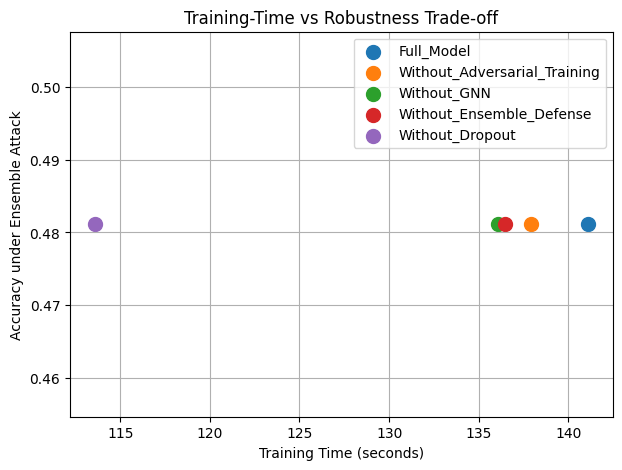

In [89]:
plt.figure(figsize=(7, 5))

for model_name in tradeoff_df.index:
    plt.scatter(
        tradeoff_df.loc[model_name, "Training_Time_Seconds"],
        tradeoff_df.loc[model_name, "Robust_Accuracy_Ensemble_Attack"],
        s=100,
        label=model_name
    )

plt.xlabel("Training Time (seconds)")
plt.ylabel("Accuracy under Ensemble Attack")
plt.title("Training-Time vs Robustness Trade-off")
plt.legend()
plt.grid(True)
plt.show()


In [92]:
plt.figure(figsize=(7, 5))

for model_name in tradeoff_df.index:
    plt.scatter(
        #tradeoff_df.loc[model_name, "Clean_Accuracy"],
        tradeoff_df.loc[model_name, "Robust_Accuracy_Ensemble_Attack"],
        s=100,
        label=model_name
    )

# Reference diagonal (ideal robustness)
max_acc = tradeoff_df[["Robust_Accuracy_Ensemble_Attack"]].max().max()
plt.plot([0, max_acc], [0, max_acc], linestyle="--")

#plt.xlabel("Clean Accuracy")
plt.ylabel("Robust Accuracy (Ensemble Attack)")
plt.title("Clean vs Robust Accuracy Trade-off")
plt.legend()
plt.grid(True)
plt.show()


TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 700x500 with 0 Axes>

In [ ]:
# Define the GNN model
class GNNModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(GNNModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation='relu')
        self.dense2 = tf.keras.layers.Dense(num_classes, activation='softmax')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return x

In [ ]:
# Create the GNN model
num_classes = len(label_encoder.classes_)
model = GNNModel(num_classes)

In [ ]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 18.1 MB/s eta 0:00:00


In [ ]:
# Define loss function and optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
# Training loop
epochs = 5
batch_size = 32
steps_per_epoch = len(X_train_scaled) // batch_size

In [ ]:
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

In [ ]:
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size
        with tf.GradientTape() as tape:
            predictions = model(X_train_tensor[start:end])
            loss = loss_object(y_train_tensor[start:end], predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss = loss_object(y_train_tensor, model(X_train_tensor))
    test_loss = loss_object(y_test_tensor, model(X_test_tensor))
    train_loss_history.append(train_loss.numpy())
    test_loss_history.append(test_loss.numpy())

    y_pred_train = np.argmax(model(X_train_tensor).numpy(), axis=1)
    y_pred_test = np.argmax(model(X_test_tensor).numpy(), axis=1)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


In [ ]:
# Evaluation
y_pred_train_prob = model(X_train_tensor).numpy()
y_pred_test_prob = model(X_test_tensor).numpy()

# Convert probabilities to class indices
y_pred_train = np.argmax(y_pred_train_prob, axis=1)
y_pred_test = np.argmax(y_pred_test_prob, axis=1)

In [ ]:
from sklearn.metrics import f1_score
# F1 Score
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

# Accuracy
train_accuracy = np.mean(np.equal(y_train, y_pred_train))
test_accuracy = np.mean(np.equal(y_test, y_pred_test))

# Other metrics
print("Train F1 Score:", f1_train)
print("Test F1 Score:", f1_test)

# Accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train F1 Score: 0.8605886748174332
Test F1 Score: 0.8608280923539126
Train Accuracy: 0.8608597330037954
Test Accuracy: 0.8611144239051216


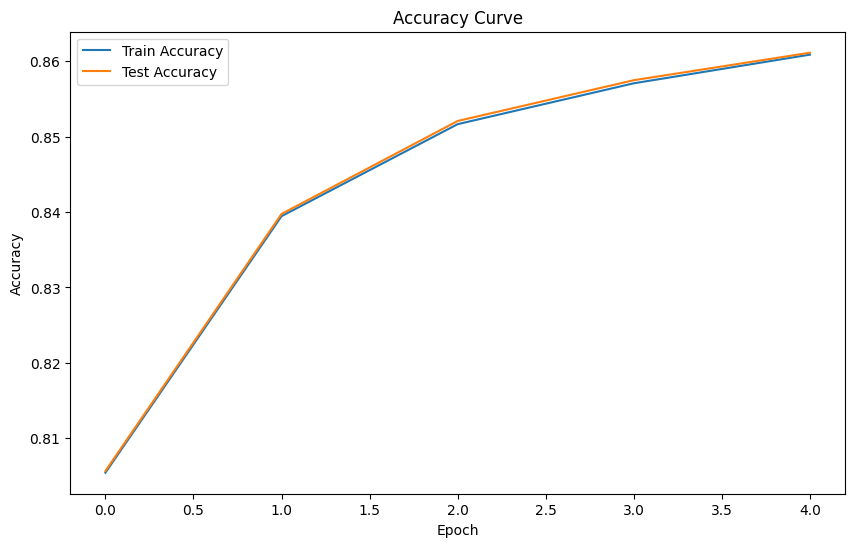

In [ ]:
from sklearn.metrics import confusion_matrix
# Confusion Matrix
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Plot Accuracy Curve
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), train_accuracy_history, label='Train Accuracy')
plt.plot(range(epochs), test_accuracy_history, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve')
plt.legend()
plt.show()

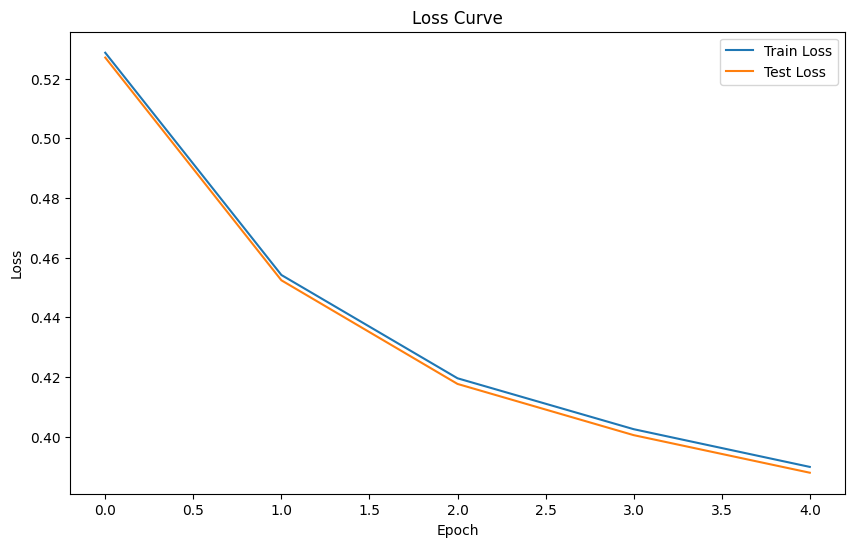

In [ ]:
# Loss Curve
plt.figure(figsize=(10, 6))
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Convert class labels to strings
class_labels_str = label_encoder.classes_.astype(str)

# Classification Report
report_train = classification_report(y_train, y_pred_train, target_names=class_labels_str)
report_test = classification_report(y_test, y_pred_test, target_names=class_labels_str)

# Display or print the classification reports
print("Classification Report - Train:")
print(report_train)

print("\nClassification Report - Test:")
print(report_test)


Classification Report - Train:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87    439490
           1       0.90      0.82      0.86    440787
           2       0.83      0.98      0.90    440057
           3       0.79      0.83      0.81    440515

    accuracy                           0.86   1760849
   macro avg       0.87      0.86      0.86   1760849
weighted avg       0.87      0.86      0.86   1760849


Classification Report - Test:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87    189384
           1       0.90      0.82      0.86    188087
           2       0.83      0.98      0.90    188820
           3       0.79      0.83      0.81    188359

    accuracy                           0.86    754650
   macro avg       0.87      0.86      0.86    754650
weighted avg       0.87      0.86      0.86    754650



In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_train = roc_auc_score(y_train, y_pred_train_prob, multi_class='ovr')
roc_auc_test = roc_auc_score(y_test, y_pred_test_prob, multi_class='ovr')

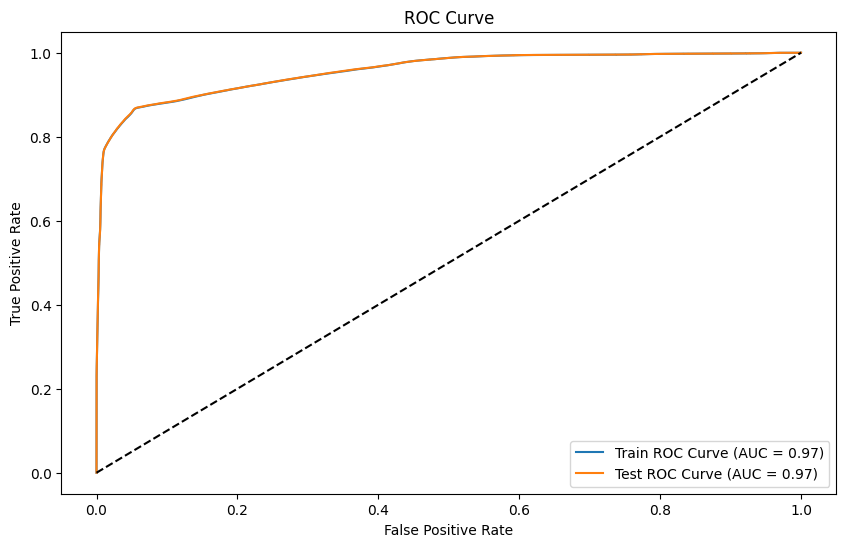

In [ ]:
from sklearn.metrics import roc_curve
# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_train_prob[:, 1], pos_label=1)
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_test_prob[:, 1], pos_label=1)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC Curve (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC Curve (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


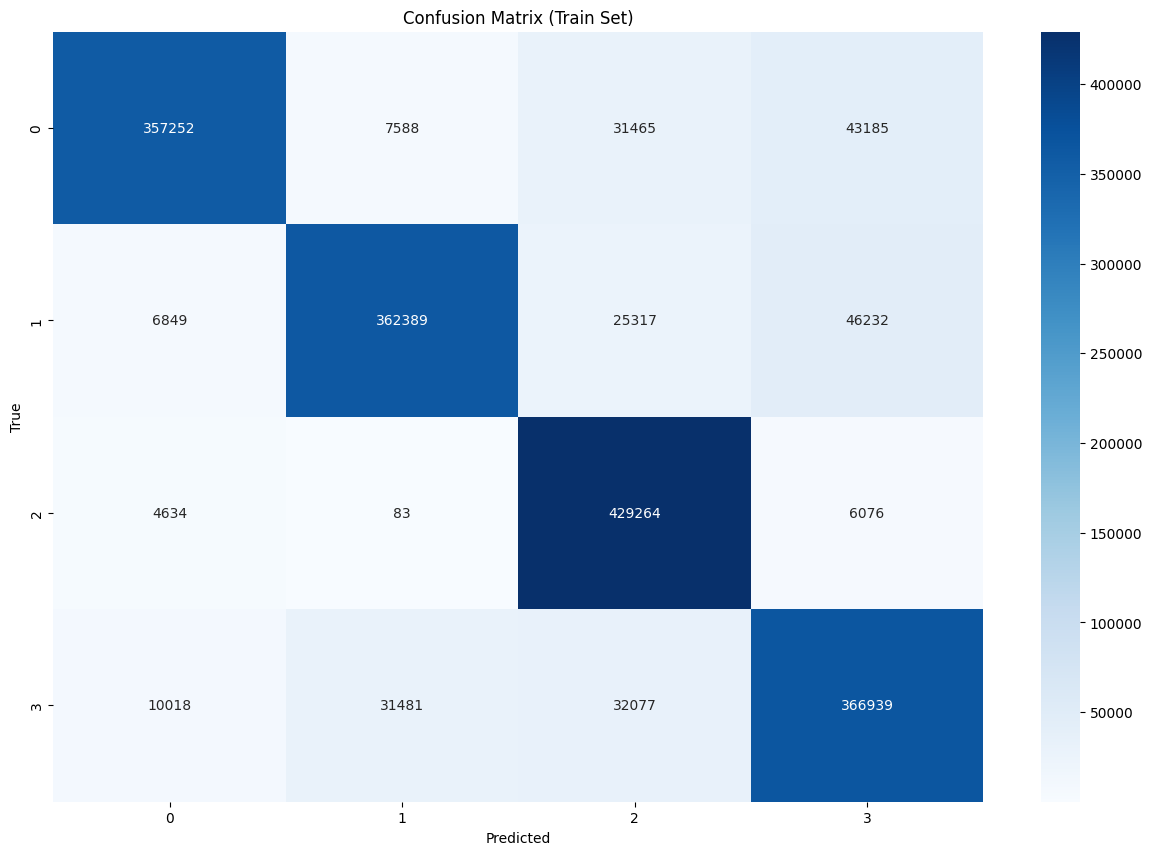

In [ ]:
# Plot Confusion Matrix Heatmap for Train Set
plt.figure(figsize=(15, 10))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Train Set)')
plt.show()

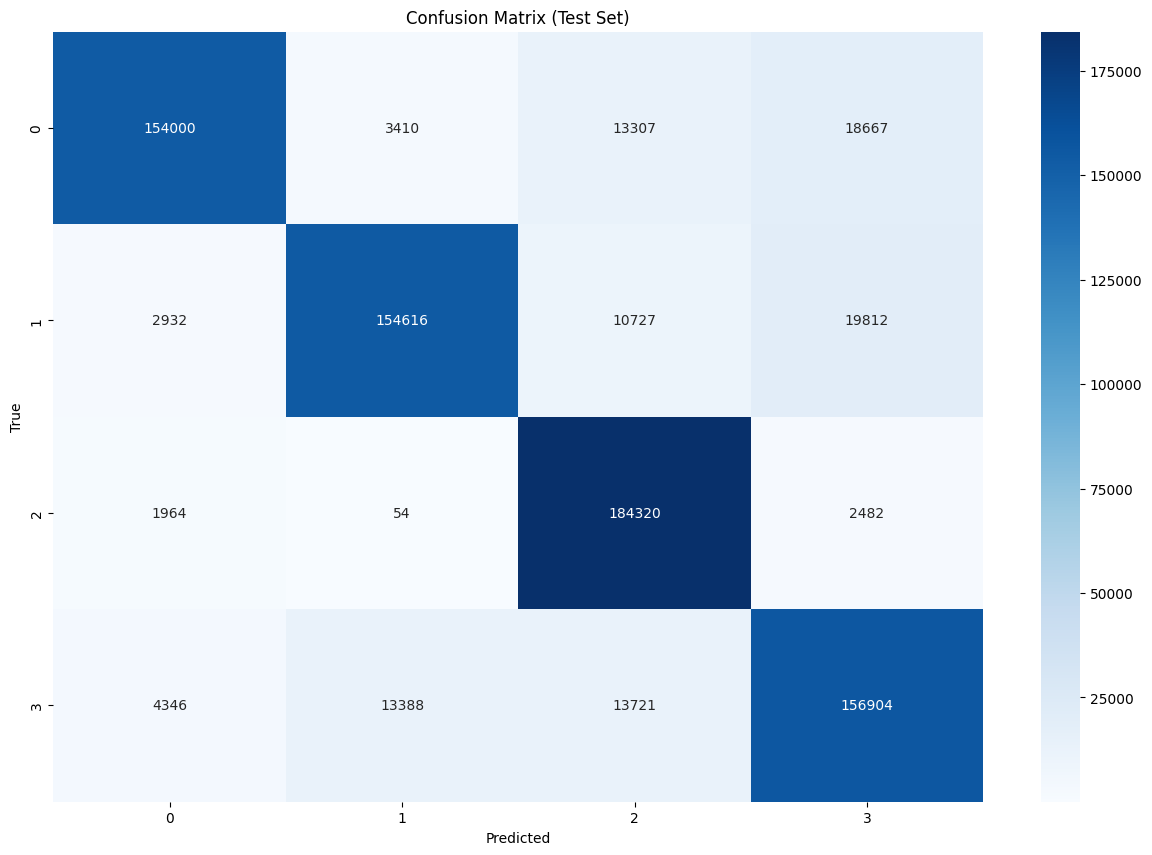

In [ ]:
# Plot Confusion Matrix Heatmap for Test Set
plt.figure(figsize=(15, 10))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

In [ ]:
import tensorflow as tf

class DeepFoolModel(tf.keras.Model):
    def __init__(self, num_classes):
        super(DeepFoolModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(32, activation='relu')
        self.dense2 = tf.keras.layers.Dense(64, activation='relu')
        self.dense3 = tf.keras.layers.Dense(num_classes, activation=None)  # No activation for logits

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        return x


In [ ]:
# Create the LSTM model
num_classes = len(label_encoder.classes_)
model = DeepFoolModel(num_classes)  # Replace 'GNNModel' with the appropriate LSTM model class
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
epochs = 10
batch_size = 32
steps_per_epoch = len(X_train_scaled) // batch_size
train_loss_history = []
test_loss_history = []
train_accuracy_history = []
test_accuracy_history = []

for epoch in range(epochs):
    for step in range(steps_per_epoch):
        start = step * batch_size
        end = (step + 1) * batch_size
        with tf.GradientTape() as tape:
            predictions = model(X_train_tensor[start:end])
            loss = loss_object(y_train_tensor[start:end], predictions)

        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss = loss_object(y_train_tensor, model(X_train_tensor))
    test_loss = loss_object(y_test_tensor, model(X_test_tensor))
    train_loss_history.append(train_loss.numpy())
    test_loss_history.append(test_loss.numpy())

    y_pred_train = np.argmax(model(X_train_tensor).numpy(), axis=1)
    y_pred_test = np.argmax(model(X_test_tensor).numpy(), axis=1)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracy_history.append(train_accuracy)
    test_accuracy_history.append(test_accuracy)

    print(f"Epoch {epoch + 1}/{epochs}, Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
